In [1]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, ConfusionMatrixDisplay

from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    path='/home/vedant/projects/'
elif platform == "darwin":
    # OS X
    path='/Users/vedant/Desktop/Programming/'

In [5]:
X_train=np.load(f'{path}ScreamDetection/resources/working_data/x_train.npy',allow_pickle = True)
y_train=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_train_hot.npy',allow_pickle = True),axis=1)

X_test=np.load(f'{path}ScreamDetection/resources/working_data/x_test.npy',allow_pickle = True)
y_test=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_test_hot.npy',allow_pickle = True),axis=1)


## kNN results for 3 class with test set accuracies

Overall Accuracy Score: 0.6754716981132075
Class-wise accuracy:
[0.8778626 0.1221374 0.       ]
[0.47368421 0.50415512 0.02216066]
[0.11551155 0.09240924 0.79207921]
Macro Accuracy: 0.7104357072368469
Confusion Matrix:


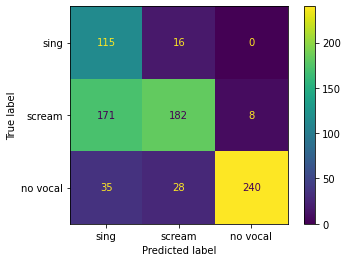

In [3]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm=confusion_matrix(y_test,KNN_prediction)
score=precision_score(y_test,KNN_prediction, average='macro')
acc = accuracy_score(y_test,KNN_prediction)


print(f"Overall Accuracy Score: {acc}")
print("Class-wise accuracy:")
for row in cm:
    print(row/row.sum())
print(f"Macro Accuracy: {score}")

print("Confusion Matrix:")
# print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['sing','scream','no vocal']).plot()